In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
%matplotlib inline
from ethno import EthnoModel, EthnoAgent

In [16]:
m = EthnoModel(5,50,50,1,0.005,0.4,[0b00, 0b01, 0b10, 0b11], max_iters=2000)

Wall time: 2min 34s


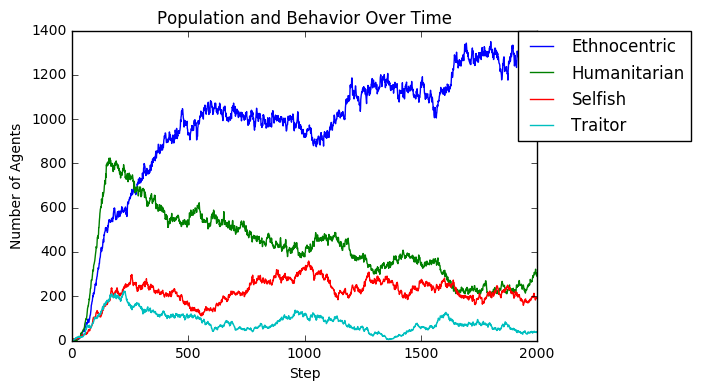

In [17]:
%%time
m.run_model()
data = m.datacollector.get_model_vars_dataframe()
ax = data[["Ethnocentric","Humanitarian", "Selfish", "Traitor"]].plot()
ax.set_title("Population and Behavior Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Agents")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

# winners = []
# for _ in range(10):
#     m = EthnoModel(5,50,50,1,0.005,1,[0b00, 0b01, 0b10, 0b11], max_iters=2000)
#     m.run_model()
#     data = m.datacollector.get_model_vars_dataframe()
#     S_mean_count = (data.Selfish[1900:].get_values().mean(),'S')
#     T_mean_count = (data.Traitor[1900:].get_values().mean(),'T')
#     E_mean_count = (data.Ethnocentric[1900:].get_values().mean(),'E')
#     H_mean_count = (data.Humanitarian[1900:].get_values().mean(),'H')
#     winners.append(max(S_mean_count,T_mean_count,E_mean_count,H_mean_count)[1])

In [4]:
%%time
agg = {}
for i in range(21):
    misp = i/20.0
    m = EthnoModel(5,50,50,1,0.005,misp,[0b00, 0b01, 0b10, 0b11], max_iters=2000)
    m.run_model()
    data = m.datacollector.get_model_vars_dataframe()
    S_mean_count = data.Selfish[1900:].get_values().mean()
    T_mean_count = data.Traitor[1900:].get_values().mean()
    E_mean_count = data.Ethnocentric[1900:].get_values().mean()
    H_mean_count = data.Humanitarian[1900:].get_values().mean()
    agg[misp] = [S_mean_count,T_mean_count,E_mean_count,H_mean_count]

Wall time: 51min 26s


In [5]:
agg_table = pd.DataFrame(agg).transpose()
agg_table.columns = ['S','T','E','H']

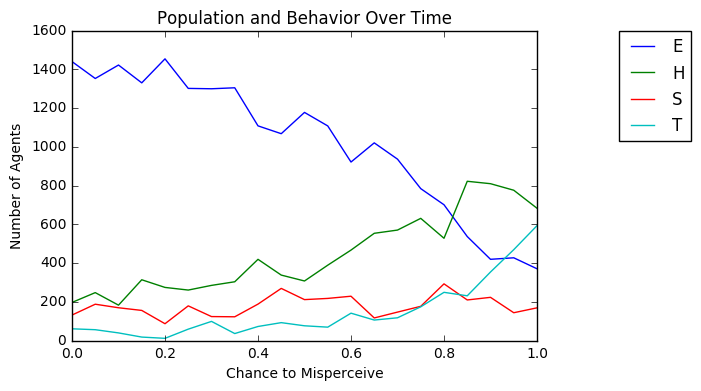

In [10]:
ax = agg_table[["E","H", "S", "T"]].plot()
ax.set_title("Population and Behavior Over Time")
ax.set_xlabel("Chance to Misperceive")
ax.set_ylabel("Number of Agents")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [7]:
m = EthnoModel(5,50,50,1,0.005,.1,[0b00, 0b01, 0b10, 0b11], max_iters=500)
m.run_model()
m.total_coops / m.total_interactions

0.7436432657575418

In [8]:
%%time
mispvstime = []
for i in range(21):
    misp = i/20.0
    m = EthnoModel(5,50,50,1,0.005,misp,[0b00, 0b01, 0b10, 0b11], max_iters=2000)
    m.run_model()
    data = m.datacollector.get_model_vars_dataframe()
    timebins = []
    for j in range(20):
        S_mean_count = (data.Selfish[j*100:(j+1)*100].get_values().mean(),0b00)
        T_mean_count = (data.Traitor[j*100:(j+1)*100].get_values().mean(),0b01)
        E_mean_count = (data.Ethnocentric[j*100:(j+1)*100].get_values().mean(),0b10)
        H_mean_count = (data.Humanitarian[j*100:(j+1)*100].get_values().mean(),0b11)
        timebins.append(max(S_mean_count,T_mean_count,E_mean_count,H_mean_count)[1])
    mispvstime.append(timebins)
mispvstime

Wall time: 51min 2s


In [18]:
mispvstime

[[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2],
 [1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,

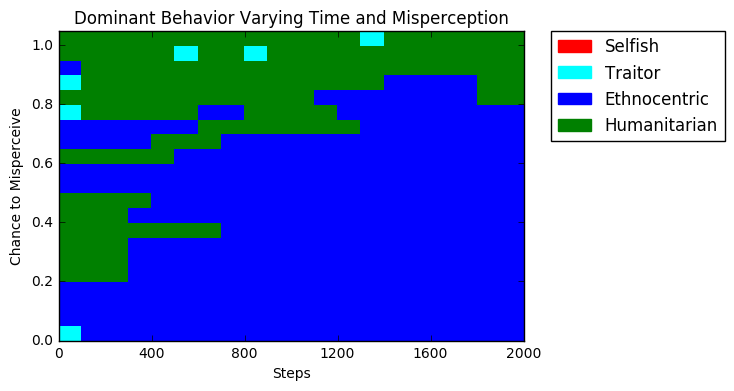

In [13]:
data = np.array(mispvstime)

cols = {0:'red',1:'cyan',2:'blue',3:'green'}
cvr = colors.ColorConverter()
tmp = sorted(cols.keys())
cols_rgb = [cvr.to_rgb(cols[k]) for k in tmp]
intervals = np.array(tmp + [tmp[-1]+1]) - 0.5
cmap, norm = colors.from_levels_and_colors(intervals,cols_rgb)
plt.pcolor(data,cmap = cmap, norm = norm)
plt.axis([0,20,0,21])
tick_xlocs = [0,4,8,12,16,20]
tick_ylocs = [0,4,8,12,16,20]
plt.xticks(tick_xlocs, [x*100 for x in tick_xlocs])
plt.yticks(tick_ylocs, [x/20.0 for x in tick_ylocs])
s_patch = mpatches.Patch(color='red', label='Selfish')
t_patch = mpatches.Patch(color='cyan', label='Traitor')
e_patch = mpatches.Patch(color='blue', label='Ethnocentric')
h_patch = mpatches.Patch(color='green', label='Humanitarian')
plt.legend(handles=[s_patch,t_patch,e_patch,h_patch],bbox_to_anchor=(1.45, 1.025))
plt.title('Dominant Behavior Varying Time and Misperception')
plt.xlabel('Steps')
plt.ylabel('Chance to Misperceive')